In [2]:
import supy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functions.util import *
from matplotlib import cm
import seaborn as sns

sp.show_version()

SuPy version: 2024.12.3.dev
-------------


In [3]:
infolder = 'C:/GitHub/SUEWS_DB_Typology_test/data/b_test_8_11/mc11'
nml = infolder + '/GridLayoutmc.nml'

import xml.etree.ElementTree as ET

def parse_nml_to_dict(nml_file):
    with open(nml_file, 'r') as file:
        nml_content = file.read()
    
    lines = nml_content.split('\n')
    nml_dict = {}
    current_section = None

    for line in lines:
        line = line.strip()
        if not line or line.startswith('/'):
            continue
        if line.startswith('&'):
            current_section = line[1:]
            nml_dict[current_section] = {}
        elif '=' in line:
            key, value = line.split('=', 1)
            key = key.strip()
            value = value.strip().rstrip(',')
            values = [float(v) if '.' in v else int(v) for v in value.split(',')]
            nml_dict[current_section][key] = values

    return nml_dict

parse_nml_to_dict(nml)



{'dim': {'nlayer': [3]},
 'geom': {'height': [0.0, 8.0, 17.0, 49.0],
  'building_frac': [0.331, 0.232, 0.034],
  'veg_frac': [0.08, 0.015, 0.0],
  'building_scale': [21.481, 25.263, 31.455],
  'veg_scale': [8.888, 19.793, 1.546]},
 'roof': {'sfr_roof': [0.48328531347114406,
   0.17524943068154653,
   0.34138976610762317],
  'tin_roof': [5, 5, 6],
  'alb_roof': [0.17999999999999997, 0.17999999999999997, 0.17999999999999997],
  'emis_roof': [0.92, 0.9200000000000002, 0.9200000000000008],
  'state_roof': [0.0, 0.0, 0.0],
  'statelimit_roof': [5, 5, 5],
  'wetthresh_roof': [5, 5, 5],
  'soilstore_roof': [20, 20, 20],
  'soilstorecap_roof': [120, 120, 120],
  'roof_albedo_dir_mult_fact(1,:)': [1.0, 1.0, 1.0],
  'dz_roof(1,:)': [0.22, 0.1205263157894737, 0.26, 0.001, 0.001],
  'k_roof(1,:)': [0.19, 0.035, 0.43, 1.2, 1.2],
  'cp_roof(1,:)': [837000.0, 1000000.0, 1080000.0, 2000000.0, 2000000.0],
  'dz_roof(2,:)': [0.22, 0.1205263157894737, 0.26, 0.001, 0.001],
  'k_roof(2,:)': [0.19, 0.035, 0

In [7]:
infolder = 'C:/GitHub/SUEWS_DB_Typology_test/data/b_test_8_11'

rc_mc_r = infolder + '/Runcontrol_mc11_r.nml'
df_state_init_mc= sp.init_supy(rc_mc_r)

rc_mc_std = infolder + '/Runcontrol_mc11.nml'
df_state_init_mc_std= sp.init_supy(rc_mc_std)

df_forcing = sp.load_forcing_grid(rc_mc_r, 111)
df_forcing['U'] = df_forcing['U'].apply(lambda x: x if x >= 0.5 else 0.5)

# p2 2018-06-28 - 2018-07-05
p2s = '2018-06-28'
p2e = '2018-07-05'

2025-02-24 15:25:31,479 - SuPy - INFO - All cache cleared.
2025-02-24 15:25:32,485 - SuPy - INFO - All cache cleared.
2025-02-24 15:25:33,487 - SuPy - INFO - All cache cleared.


In [5]:
test = pd.concat([df_state_init_mc,df_state_init_mc_std])

In [5]:
infolder = 'C:/GitHub/SUEWS_DB_Typology_test/data/AVL_1_LDN1'

rc = infolder + '/RunControl.nml'
init_s = sp.init_supy(rc)

df_forcing = sp.load_forcing_grid(rc, 1)
df_forcing


2025-02-24 15:06:45,508 - SuPy - INFO - All cache cleared.
2025-02-24 15:06:46,706 - SuPy - INFO - All cache cleared.


,iy,id,it,imin,qn,qh,qe,qs,qf,U,...,snow,ldown,fcld,Wuh,xsmd,lai,kdiff,kdir,wdir,isec
2012-01-01 00:05:00,2012,1,0,5,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
2012-01-01 00:10:00,2012,1,0,10,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
2012-01-01 00:15:00,2012,1,0,15,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
2012-01-01 00:20:00,2012,1,0,20,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
2012-01-01 00:25:00,2012,1,0,25,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 23:40:00,2012,366,23,40,-999.0,-999.0,-999.0,-999.0,-999.0,3.060,...,-999.0,348.140,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,46.7,0
2012-12-31 23:45:00,2012,366,23,45,-999.0,-999.0,-999.0,-999.0,-999.0,3.060,...,-999.0,348.140,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,46.7,0
2012-12-31 23:50:00,2012,366,23,50,-999.0,-999.0,-999.0,-999.0,-999.0,3.060,...,-999.0,348.140,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,46.7,0
2012-12-31 23:55:00,2012,366,23,55,-999.0,-999.0,-999.0,-999.0,-999.0,3.060,...,-999.0,348.140,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,46.7,0


,iy,id,it,imin,qn,qh,qe,qs,qf,U,...,snow,ldown,fcld,Wuh,xsmd,lai,kdiff,kdir,wdir,isec
2012-01-01 00:05:00,2012,1,0,5,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
2012-01-01 00:10:00,2012,1,0,10,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
2012-01-01 00:15:00,2012,1,0,15,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
2012-01-01 00:20:00,2012,1,0,20,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
2012-01-01 00:25:00,2012,1,0,25,-999.0,-999.0,-999.0,-999.0,-999.0,5.592,...,-999.0,376.545,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,50.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 23:40:00,2012,366,23,40,-999.0,-999.0,-999.0,-999.0,-999.0,3.060,...,-999.0,348.140,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,46.7,0
2012-12-31 23:45:00,2012,366,23,45,-999.0,-999.0,-999.0,-999.0,-999.0,3.060,...,-999.0,348.140,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,46.7,0
2012-12-31 23:50:00,2012,366,23,50,-999.0,-999.0,-999.0,-999.0,-999.0,3.060,...,-999.0,348.140,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,46.7,0
2012-12-31 23:55:00,2012,366,23,55,-999.0,-999.0,-999.0,-999.0,-999.0,3.060,...,-999.0,348.140,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,46.7,0


In [13]:
df_state_init_mc_n = test.copy()


a = list(df_state_init_mc_n.filter(like='tsf').columns)
for col in a:
    df_state_init_mc_n.loc[:,col] = 283.15
df_state_init_mc_n

a = list(df_state_init_mc_n.filter(like='temp_roof').columns)
for col in a:
    df_state_init_mc_n.loc[:,col] = 283.15

a = list(df_state_init_mc_n.filter(like='temp_wall').columns)
for col in a:
    df_state_init_mc_n.loc[:,col] = 283.15

a = list(df_state_init_mc_n.filter(like='temp_surf').columns)
for col in a:
    df_state_init_mc_n.loc[:,col] = 283.15

a = list(df_state_init_mc_n.filter(like='dz').columns)
for col in a:
    df_state_init_mc_n.loc[:,col] = df_state_init_mc_n.loc[:,col] * 100

a = list(df_state_init_mc_n.filter(like='cp').columns)
for col in a:
    df_state_init_mc_n.loc[:,col] = df_state_init_mc_n.loc[:,col] * 1000

In [14]:
# p2 2018-06-28 - 2018-07-05
s = '2018-06-29 08:00'
e = '2018-07-01'

# To SSEHC
test.loc[:, 'netradiationmethod'] = 1003 # Spartacus
test.loc[:, 'storageheatmethod'] = 1 # OHM
test.loc[:, 'ohmincqf'] = 0
test.loc[:, 'diagmethod'] = 2

test.loc[:, 'timezone'] = 0

# df_output_2017, df_final_state_2017 = process_in_chunks(test, df_forcing.loc[s:e],chunk_size = 2)

df_state_init_mc_n = test.copy()
df_state_init_mc_n.loc[:, 'netradiationmethod'] = 1003 #Spartacus
df_state_init_mc_n.loc[:, 'storageheatmethod'] = 5 # OHM
df_state_init_mc_n.loc[:, 'ohmincqf'] = 0
df_state_init_mc_n.loc[:, 'diagmethod'] = 2

df_output_2017_n, df_final_state_2017 = process_in_chunks(df_state_init_mc_n, df_forcing.loc[s:e],chunk_size = 2)


1
2025-02-24 15:30:49,531 - SuPy - INFO - ====================
2025-02-24 15:30:49,533 - SuPy - INFO - Simulation period:
2025-02-24 15:30:49,534 - SuPy - INFO -   Start: 2018-06-29 08:00:00
2025-02-24 15:30:49,536 - SuPy - INFO -   End: 2018-07-01 23:55:00
2025-02-24 15:30:49,536 - SuPy - INFO - 
2025-02-24 15:30:49,537 - SuPy - INFO - No. of grids: 2
2025-02-24 15:30:49,538 - SuPy - INFO - SuPy is running in serial mode
2025-02-24 15:31:49,420 - SuPy - INFO - Execution time: 59.9 s
2025-02-24 15:31:49,420 - SuPy - INFO - ====================



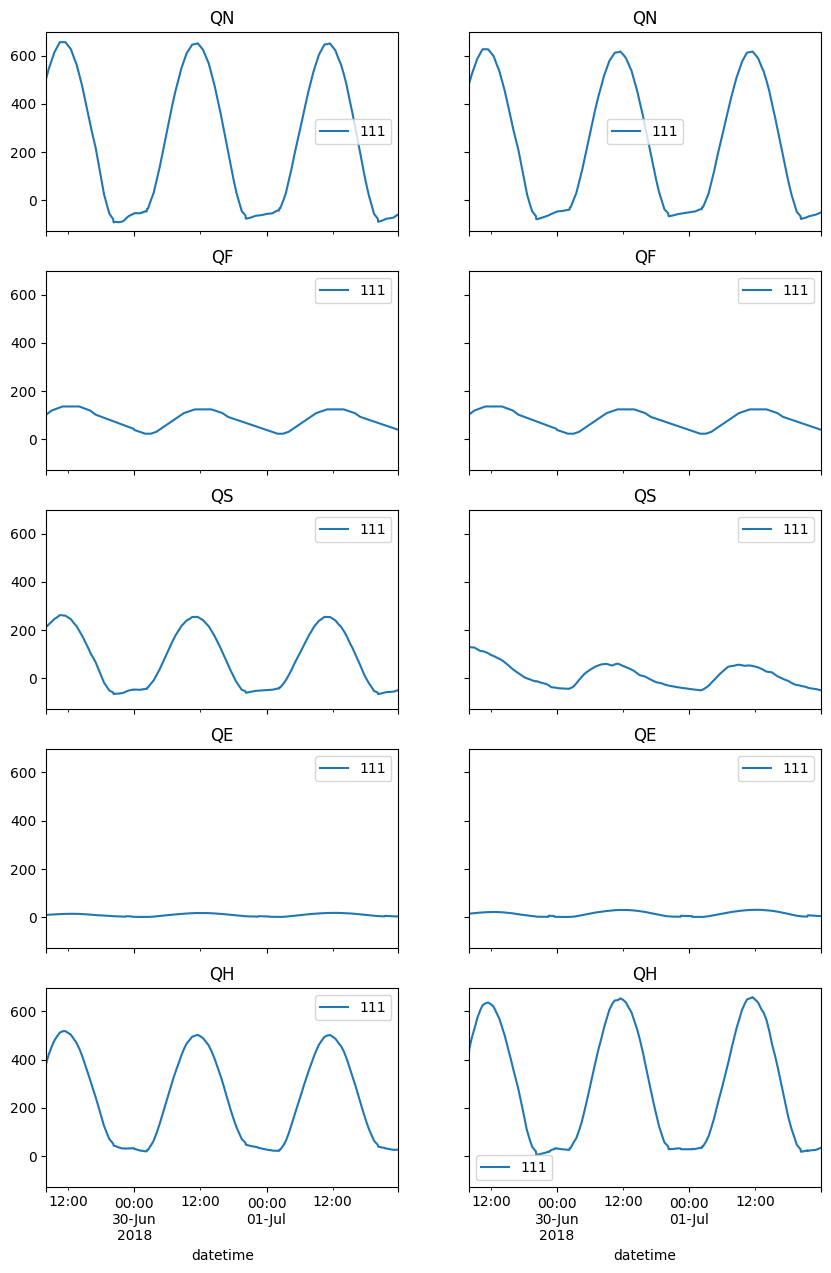

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize = (10,15), sharex = True, sharey = True)

for var, row in zip(['QN', 'QF','QS', 'QE','QH'], [0,1,2,3,4]):
    for df, col in zip([df_output_2017.SUEWS, df_output_2017_n.SUEWS], [0,1]):
    
        df_d = pd.DataFrame()
        df_d[111] = df.loc[111,var]
        # df_d[112] = df.loc[112,var]
        
        df_d.plot(ax = axes[row,col])
        axes[row,col].set_title(var)

        # axes.legend(['real','standard'])

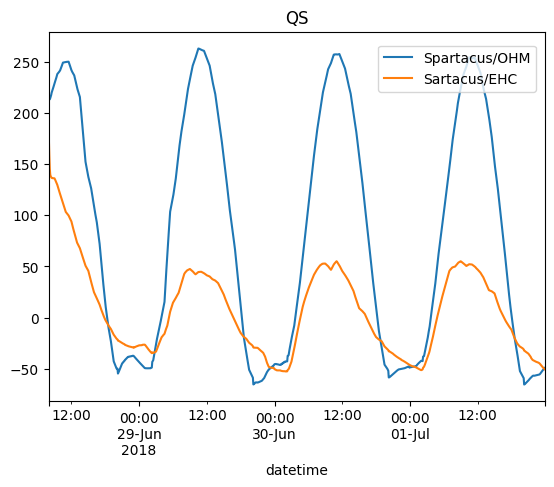

In [24]:
var = 'QS'
df_d = pd.DataFrame()
df_d[111] = df_output_2017.SUEWS.loc[111,var]
df_d[112] = df_output_2017_n.SUEWS.loc[111,var]

ax = df_d.plot()
ax.set_title(var)
ax.legend(['Spartacus/OHM','Sartacus/EHC'], loc='center left',bbox_to_anchor=(0.65, .9))


<Axes: xlabel='grid,datetime'>

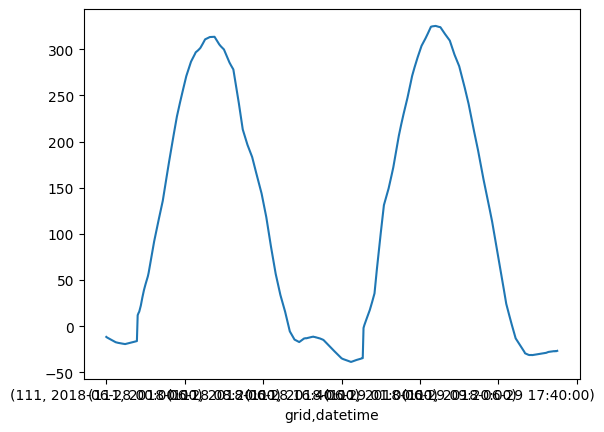

In [45]:
df_s = df_output_2017.SUEWS
df_s['QS'].plot()

# df_s_n = df_output_2017_n.SUEWS
# df_s_n['QS'].plot()



In [7]:
test_init.loc[:, 'netradiationmethod'] = 300 #NARP
test_init.loc[:, 'storageheatmethod'] = 1 # OHM

df_output_2017, df_final_state_2017 = process_in_chunks(test_init, df_forcing.loc['2017-01-01': '2017-12-31'],chunk_size = 2)

# Start date
start_date = '2018-01-01 00:00:00'
# p2
df_output_spinup, df_final_state_spinup = process_in_chunks(df_final_state_2017.loc[start_date], df_forcing.loc[start_date: p2s], chunk_size = 3)

1
2025-01-22 11:33:48,464 - SuPy - INFO - ====================
2025-01-22 11:33:48,480 - SuPy - INFO - Simulation period:
2025-01-22 11:33:48,480 - SuPy - INFO -   Start: 2017-01-01 00:00:00
2025-01-22 11:33:48,480 - SuPy - INFO -   End: 2017-12-31 23:55:00
2025-01-22 11:33:48,480 - SuPy - INFO - 
2025-01-22 11:33:48,480 - SuPy - INFO - No. of grids: 2
2025-01-22 11:33:48,480 - SuPy - INFO - SuPy is running in serial mode
2025-01-22 11:35:06,565 - SuPy - INFO - Execution time: 78.1 s
2025-01-22 11:35:06,566 - SuPy - INFO - ====================

1
2025-01-22 11:35:06,571 - SuPy - INFO - ====================
2025-01-22 11:35:06,572 - SuPy - INFO - Simulation period:
2025-01-22 11:35:06,573 - SuPy - INFO -   Start: 2018-01-01 00:00:00
2025-01-22 11:35:06,574 - SuPy - INFO -   End: 2018-06-28 23:55:00
2025-01-22 11:35:06,575 - SuPy - INFO - 
2025-01-22 11:35:06,576 - SuPy - INFO - No. of grids: 2
2025-01-22 11:35:06,577 - SuPy - INFO - SuPy is running in serial mode
2025-01-22 11:35:45,680

In [ ]:

# NarpOMH
df_output_p2_all_narp, df_final_state_p2_all = process_in_chunks(df_final_state_spinup.loc['2018-06-29 00:00:00'], df_forcing.loc[p2s: p2e], chunk_size = 3)
df_suews_narp = df_output_p2_all_narp.SUEWS

# To SSEHC
df_final_state_spinup.loc[:, 'netradiationmethod'] = 1001
df_final_state_spinup.loc[:, 'storageheatmethod'] =5

# SpartacusEHC
df_output_p2_all, df_final_state_p2_all = process_in_chunks(df_final_state_spinup.loc['2018-06-29 00:00:00'], df_forcing.loc[p2s: p2e], chunk_size = 1)
df_suews = df_output_p2_all.SUEWS



1
2025-01-22 11:35:45,737 - SuPy - INFO - ====================
2025-01-22 11:35:45,738 - SuPy - INFO - Simulation period:
2025-01-22 11:35:45,739 - SuPy - INFO -   Start: 2018-06-28 00:00:00
2025-01-22 11:35:45,739 - SuPy - INFO -   End: 2018-07-05 23:55:00
2025-01-22 11:35:45,740 - SuPy - INFO - 
2025-01-22 11:35:45,741 - SuPy - INFO - No. of grids: 2
2025-01-22 11:35:45,744 - SuPy - INFO - SuPy is running in serial mode
2025-01-22 11:35:48,231 - SuPy - INFO - Execution time: 2.5 s
2025-01-22 11:35:48,231 - SuPy - INFO - ====================

2
2025-01-22 11:35:48,236 - SuPy - INFO - ====================
2025-01-22 11:35:48,237 - SuPy - INFO - Simulation period:
2025-01-22 11:35:48,237 - SuPy - INFO -   Start: 2018-06-28 00:00:00
2025-01-22 11:35:48,238 - SuPy - INFO -   End: 2018-07-05 23:55:00
2025-01-22 11:35:48,239 - SuPy - INFO - 
2025-01-22 11:35:48,240 - SuPy - INFO - No. of grids: 1
2025-01-22 11:35:48,241 - SuPy - INFO - SuPy is running in serial mode
2025-01-22 11:37:23,351 

In [ ]:
var = 'QS'
df_d = pd.DataFrame()
df_d[111] = df_suews.loc[111,var]
df_d[112] = df_suews.loc[112,var]

ax = df_d.plot()
ax.legend(['DB','Std'])

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize = (15,10), sharex = True)

for var, row in zip(['QN', 'QS', 'QE','QH'], [0,1,2,3,4]):
    for df, col in zip([df_suews, df_suews_narp], [0,1]):
    
        df_d = pd.DataFrame()
        df_d[111] = df.loc[111,var]
        df_d[112] = df.loc[112,var]

        axes[row,col] = df_d.plot(ax = axes[row,col] )
        axes[row,col].set_title(var)

        ax.legend(['real','standard'])

IndentationError: expected an indented block after 'for' statement on line 4 (2980144342.py, line 6)

In [26]:
df_state_init, df_forcing = sp.load_SampleData()
grid = df_state_init.index[0]
# by default, two years of forcing data are included;
# to save running time for demonstration, we only use one year in this demo
df_forcing=df_forcing.loc['2012'].iloc[1:]


2025-01-22 13:18:16,589 - SuPy - INFO - All cache cleared.
